In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
t0 = 0
t1 = 300
dt = 0.01

In [3]:
x0, v0 = 1, 0

In [5]:
k = 1
m = 1

In [28]:
def euler_step(x,v,dt):
    x2 = x + v*dt
    v2 = v + (-k/m*x)*dt
    return x2, v2

In [29]:
t = t0
x = x0
v = v0
xl = [x0]
vl = [v0]
while t < t1:
    x, v = euler_step(x,v,dt)
    xl.append(x)
    vl.append(v)
    t += dt
# print(xl,vl)

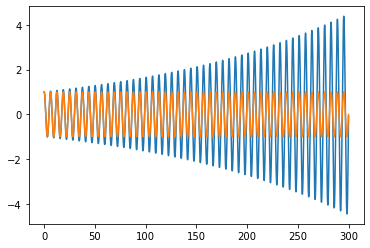

In [32]:
tl = np.arange(t0,t1+2*dt,dt)
plt.plot(tl,xl,tl,np.cos(tl))

In [23]:
def verlet_step(x,v,dt):
    a = (-k/m*x)
    x2 = x + v*dt + a*(dt**2)/2
    a2 = (-k/m*x2)
    v2 = v + (a+a2)*dt/2
    return x2, v2

In [33]:
t = t0
x = x0
v = v0
xl = [x0]
vl = [v0]
while t < t1:
    x, v = verlet_step(x,v,dt)
    xl.append(x)
    vl.append(v)
    t += dt
# print(xl,vl)

(290, 300)

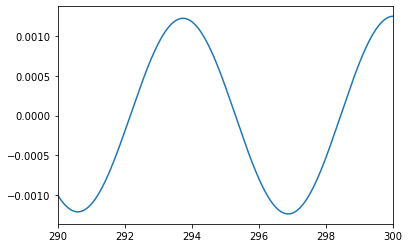

In [44]:
tl = np.arange(t0,t1+2*dt,dt)
plt.plot(tl,xl-np.cos(tl))
plt.xlim(290,300)

In [45]:
m = 1
hbar = 1
def verlet_step_phi(phi,phi_x,x,dx,potl_fn,energy):
    phi_xx = 2*m/hbar**2*(potl_fn(x)-energy)*phi
    phi2 = phi + phi_x*dx + phi_xx*(dx**2)/2
#     x2 = x + v*dt + a*(dt**2)/2
    phi_xx2 = 2*m/hbar**2*(potl_fn(x+dx)-energy)*phi2
#     a2 = (-k/m*x2)
    phi_x2 = phi_x + (phi_xx+phi_xx2)*dx/2
#     v2 = v + (a+a2)*dt/2
    return phi2, phi_x2

In [139]:
def sho(x):
    return x**2/2 # k=1

x0 = -10
x1 = +10
dx = 0.00001
phi0 = 0
phi_x0 = 0.01
phil = [phi0]
phi = phi0
phi_x = phi_x0
x = x0
xl = [x0]
while x < x1:
    phi, phi_x = verlet_step_phi(phi, phi_x, x, dx, sho, 10.5)
    phil.append(phi)
    x += dx
    xl.append(x)

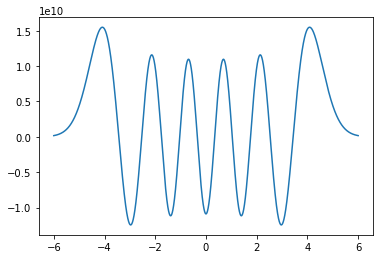

In [140]:
xa = np.array(xl)
phia = np.array(phil)
mask = np.abs(xa) < 6
plt.plot(xa[mask],phia[mask])

In [138]:
phil[mask]

TypeError: only integer scalar arrays can be converted to a scalar index